In [4]:
import copy

import numpy as np
import scipy as scipy

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm


from scipy.fft import fft
#from scipy.stats import wasserstein_distance
from scipy import ndimage

from marvin.tools import Maps
from marvin.tools.image import Image
from marvin.utils.general.images import showImage


from importlib import reload 

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import Simpler_Classifier

my_module = reload(Simpler_Classifier) # reload of Simpler_Classifier without restart

In [5]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('normal')



[WARNING]: Casting complex values to real discards the imaginary part (ComplexWarning)


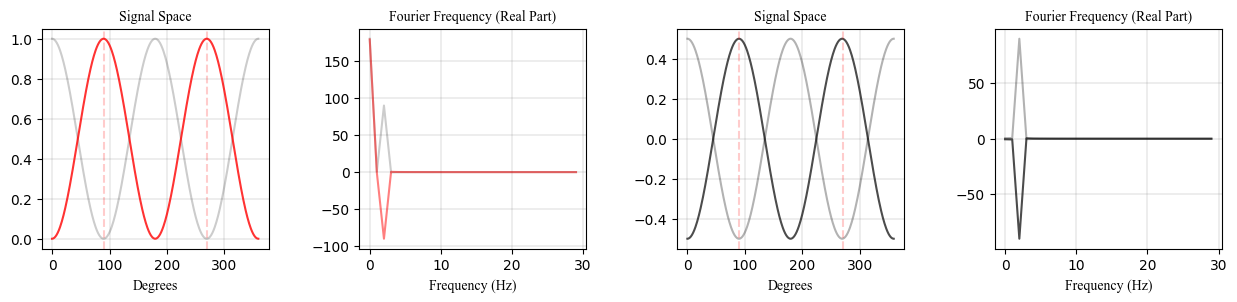

In [6]:
fig = plt.figure(figsize=(7, 7))
rows = 1
columns = 4


sim_x = np.linspace(0,2*np.pi,360)
sim_y1 = 0.5*np.cos(2*sim_x)+0.5
sim_y2 = 0.5*np.cos(2*sim_x-np.pi)+0.5
sim_y3 = 0.5*np.cos(2*sim_x)
sim_y4 = 0.5*np.cos(2*sim_x-np.pi)

yf1 = fft(sim_y1)
yf2 = fft(sim_y2)
yf3 = fft(sim_y3)
yf4 = fft(sim_y4)

fig.add_subplot(rows, columns, 1)
fig.set_figheight(2)
fig.set_figwidth(2)
plt.title("Signal Space", fontproperties=font)
plt.xlabel('Degrees', fontproperties=font)
plt.plot(sim_y1, c='k',alpha=0.2)
plt.plot(sim_y2, c='r',alpha=0.8)
plt.grid(color='grey', linestyle='-', linewidth=0.2)
bound = [90,270]
for xc in bound:
    plt.axvline(x = xc, linestyle = '--', color = 'r', alpha=0.2)


fig.add_subplot(rows, columns, 2)
fig.set_figheight(2)
fig.set_figwidth(2)
plt.title("Fourier Frequency (Real Part)", fontproperties=font)
plt.xlabel('Frequency (Hz)', fontproperties=font)
plt.plot(yf1[0:30], c='k',alpha=0.2)
plt.plot(yf2[0:30], c='r',alpha=0.5)
plt.grid(color='grey', linestyle='-', linewidth=0.2)

fig.add_subplot(rows, columns, 3)
fig.set_figheight(2)
fig.set_figwidth(2)
plt.title("Signal Space", fontproperties=font)
plt.xlabel('Degrees', fontproperties=font)
plt.plot(sim_y3,c='k',alpha=0.3)
plt.plot(sim_y4,c='k',alpha=0.7)
plt.grid(color='grey', linestyle='-', linewidth=0.2)
bound = [90, 270]
for xc in bound:
    plt.axvline(x = xc, linestyle = '--', color = 'r', alpha=0.2)

fig.add_subplot(rows, columns, 4)
fig.set_figheight(2)
fig.set_figwidth(2)
plt.title("Fourier Frequency (Real Part)", fontproperties=font)
plt.xlabel('Frequency (Hz)', fontproperties=font)
plt.plot(yf3[0:30],c='k',alpha=0.3)
plt.plot(yf4[0:30],c='k',alpha=0.7)
plt.grid(color='grey', linestyle='-', linewidth=0.2)

plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=6, 
                top=1.2, 
                wspace=0.4, 
                hspace=0.4)


plt.show()

In [38]:
def randize(array):
    leng = len(array)
    rand_index_0 = np.random.randint(0,leng,round(0.3*leng))
    rand_index_r = np.random.randint(0,leng,round(0.7*leng))
    lever = (max(array)-min(array))/5
    for i in range(leng):
        if i in rand_index_0:
            array[i] = min(array)
        elif i in rand_index_r:
            array[i] = array[i] + np.random.randint(0,10*lever,1)/10
        else:
            pass
    return array


    

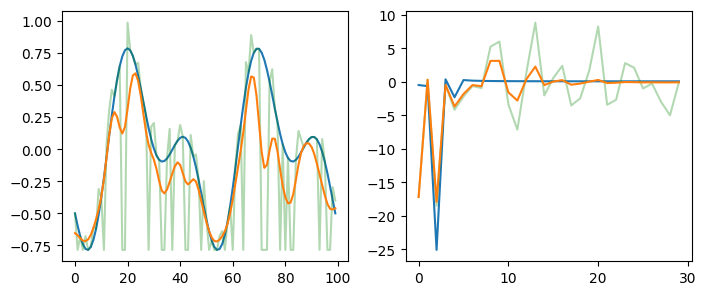

In [60]:
fig = plt.figure(figsize=(3, 7))

sim_x = np.linspace(0,4*np.pi,100)
f1 = -0.5*np.cos(sim_x)
f2 = -0.4*np.cos(2*(sim_x))
f3 = -0.4*np.sin(2*(sim_x))

sim_o = f1+f3
sim_c = copy.deepcopy(sim_o)
sim_t = randize(sim_c)
sim_sm = scipy.ndimage.gaussian_filter(sim_t, sigma = 2)




fig.add_subplot(1, 2, 1)
fig.set_figheight(5)
fig.set_figwidth(7)
plt.plot(sim_o)
plt.plot(sim_t, c='g',alpha=0.3)
plt.plot(sim_sm)


fig.add_subplot(1, 2, 2)
fig.set_figheight(5)
fig.set_figwidth(7)
plt.plot(fft(sim_o)[0:30])
plt.plot(fft(sim_t)[0:30],c='g',alpha=0.3)
plt.plot(fft(sim_sm)[0:30])


plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=1.0, 
                top=0.6, 
                wspace=0.2, 
                hspace=0.2)
plt.show()


In [3]:
n = 10

count = 0
for i in np.linspace(0,n-1,n):
    count = count + (10**i)
    
count

1111111111.0